In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as ply
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,AveragePooling2D

In [7]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [8]:
X_train.shape


(60000, 28, 28)

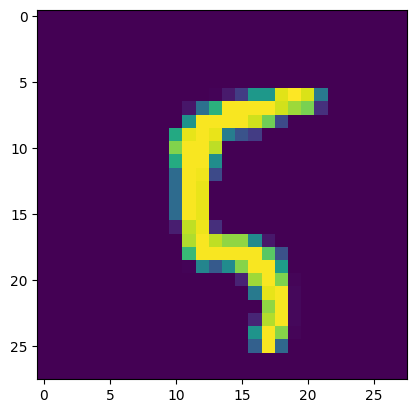

In [10]:
ply.imshow(X_train[100])

In [11]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

# LeNet Architecture

In [12]:
model=Sequential()
model.add(Conv2D(6,kernel_size=(5,5),padding='valid',activation='tanh',input_shape=(28,28,1)))
model.add(AveragePooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Conv2D(16,kernel_size=(5,5),padding='valid',activation='tanh'))
model.add(AveragePooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(120,activation='tanh'))
model.add(Dense(84,activation='tanh'))
model.add(Dense(10,activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 24, 24, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 12, 12, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 8, 8, 16)       │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 4, 4, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 120)            │        30,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,426 (173.54 KB)

 Trainable params: 44,426 (173.54 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [15]:
model.fit(X_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 26s 16ms/step - accuracy: 0.8983 - loss: 0.3531 - val_accuracy: 0.9753 - val_loss: 0.0809
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 43s 18ms/step - accuracy: 0.9773 - loss: 0.0748 - val_accuracy: 0.9799 - val_loss: 0.0688
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 38s 16ms/step - accuracy: 0.9827 - loss: 0.0522 - val_accuracy: 0.9829 - val_loss: 0.0573
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.9879 - loss: 0.0398 - val_accuracy: 0.9811 - val_loss: 0.0630
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 38s 14ms/step - accuracy: 0.9899 - loss: 0.0321 - val_accuracy: 0.9823 - val_loss: 0.0548
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 43s 15ms/step - accuracy: 0.9899 - loss: 0.0308 - val_accuracy: 0.9811 - val_loss: 0.0666
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.9905 - loss: 0.0279 - val_accuracy: 0.9866 - val_loss: 0.0462
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 39s 15ms/step - accuracy: 0.9934 -

In [17]:
y_prob=model.predict(X_test)
y_pred=y_prob.argmax(axis=1)
accuracy_score(y_test,y_pred)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


0.9881

In [ ]:
model.save('mnist_model.h5')